In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of uniform latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Unpacking the lat_lngs zip object into a list of coordinates (list of tuples)
# In this way, random latitudes and longitudes need to be created only once
coordinates = list(lat_lngs)

The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 and more.

In [4]:
# From the citipy module import a citipy script
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities 
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
# Print the city count to confirm the sufficient count
len(cities)
# only 635 cities added from 1,500 random latitudes and longitudes because only unique pairs were added. 
# there must have been duplicates in the generated lat and lngs.

751

In [6]:
import requests

In [7]:
# Import the API key
from config import api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [9]:
# Create an end point url for the city 
query = "Boston"

In [10]:
query_url = url + "&q=" + query
print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc343adc8265fc01f4a59b9598ba22e9&q=Boston


In [11]:
city_weather = requests.get(query_url)
city_weather.status_code

200

In [12]:
city_weather = requests.get(query_url)
if city_weather.status_code==200:
    print(f"City Weather found.")
else:
    print(f"City Weather not found.")

City Weather found.


In [13]:
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":600,"main":"Snow","description":"light snow","icon":"13n"},{"id":701,"main":"Mist","description":"mist","icon":"50n"}],"base":"stations","main":{"temp":25.34,"feels_like":14.67,"temp_min":22.37,"temp_max":28.45,"pressure":1017,"humidity":88},"visibility":3219,"wind":{"speed":11.5,"deg":350},"snow":{"1h":0.25},"clouds":{"all":100},"dt":1644804003,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1644752619,"sunset":1644790408},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [14]:
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 25.34,
  'feels_like': 14.67,
  'temp_min': 22.37,
  'temp_max': 28.45,
  'pressure': 1017,
  'humidity': 88},
 'visibility': 3219,
 'wind': {'speed': 11.5, 'deg': 350},
 'snow': {'1h': 0.25},
 'clouds': {'all': 100},
 'dt': 1644804003,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1644752619,
  'sunset': 1644790408},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 28.45 88 100 11.5


In [16]:
# convert the date timestamp
date = boston_data["dt"]

In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-02-14 02:00:03'

In [19]:
city_data=[]

In [20]:
import time

In [21]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        #pass # general purpose statement to handle all errors encountered

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | mersing
Processing Record 7 of Set 1 | tulsipur
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | barcelos
Processing Record 11 of Set 1 | victor harbor
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | ouallam
Processing Record 14 of Set 1 | uwayl
City not found. Skipping...
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | margate
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | katangli
Processi

Processing Record 36 of Set 4 | sao joao da barra
Processing Record 37 of Set 4 | egvekinot
Processing Record 38 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 39 of Set 4 | mahenge
Processing Record 40 of Set 4 | kuytun
Processing Record 41 of Set 4 | walvis bay
Processing Record 42 of Set 4 | zhigansk
Processing Record 43 of Set 4 | griffith
Processing Record 44 of Set 4 | norman wells
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | kidal
Processing Record 47 of Set 4 | caconda
Processing Record 48 of Set 4 | berlevag
Processing Record 49 of Set 4 | baijiantan
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 2 of Set 5 | praya
Processing Record 3 of Set 5 | yaan
Processing Record 4 of Set 5 | sorong
Processing Record 5 of Set 5 | opuwo
Processing Record 6 of Set 5 | armacao dos buzios
City not found. Skipping...
Processing Record 7 of Set 5 | qaanaaq
Processing Record 8 of

Processing Record 24 of Set 8 | paredon
Processing Record 25 of Set 8 | galle
Processing Record 26 of Set 8 | benguela
Processing Record 27 of Set 8 | chicama
Processing Record 28 of Set 8 | may pen
Processing Record 29 of Set 8 | saint-pierre
Processing Record 30 of Set 8 | kuche
City not found. Skipping...
Processing Record 31 of Set 8 | kununurra
Processing Record 32 of Set 8 | nara
Processing Record 33 of Set 8 | junin
Processing Record 34 of Set 8 | dedza
Processing Record 35 of Set 8 | ponyri
Processing Record 36 of Set 8 | sale
Processing Record 37 of Set 8 | raton
Processing Record 38 of Set 8 | vanse
Processing Record 39 of Set 8 | rungata
City not found. Skipping...
Processing Record 40 of Set 8 | soja
Processing Record 41 of Set 8 | abong mbang
Processing Record 42 of Set 8 | amarante do maranhao
Processing Record 43 of Set 8 | labuhan
Processing Record 44 of Set 8 | pangnirtung
Processing Record 45 of Set 8 | almaznyy
Processing Record 46 of Set 8 | sitka
Processing Record 

Processing Record 9 of Set 12 | tuytepa
Processing Record 10 of Set 12 | mvomero
Processing Record 11 of Set 12 | kachiry
Processing Record 12 of Set 12 | laiwu
Processing Record 13 of Set 12 | polyarnyy
Processing Record 14 of Set 12 | deputatskiy
Processing Record 15 of Set 12 | seymchan
Processing Record 16 of Set 12 | krasnoselkup
Processing Record 17 of Set 12 | itoman
Processing Record 18 of Set 12 | borogontsy
Processing Record 19 of Set 12 | san ignacio
Processing Record 20 of Set 12 | cairo montenotte
Processing Record 21 of Set 12 | sioux lookout
Processing Record 22 of Set 12 | chalus
Processing Record 23 of Set 12 | ballinrobe
Processing Record 24 of Set 12 | tula
Processing Record 25 of Set 12 | balsas
Processing Record 26 of Set 12 | necochea
Processing Record 27 of Set 12 | bousso
Processing Record 28 of Set 12 | ayan
Processing Record 29 of Set 12 | elbeuf
Processing Record 30 of Set 12 | calama
Processing Record 31 of Set 12 | ranot
Processing Record 32 of Set 12 | gri

Processing Record 46 of Set 15 | xining
Processing Record 47 of Set 15 | morlaix
Processing Record 48 of Set 15 | tautira
Processing Record 49 of Set 15 | bat khela
Processing Record 50 of Set 15 | trairi
Processing Record 1 of Set 16 | cururupu
-----------------------------
Data Retrieval Complete      
-----------------------------


Let's break down the code so we understand fully before continuing:

We create the for loop with the enumerate() method and reference the index and the city in the list.
In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. If the statement is true, then the set_count and the record_count are incremented by 1.
Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
Then we add one to the record count before the next city is processed.
Next, we will retrieve the data from the JSON weather response for each city.

Generally, it isn't good coding practice to add the pass statement to the except block. Ideally, we want to handle or catch each error as it happens and do something specific (e.g., add another try block or print out the error).

Documentation on errors and exceptions (https://docs.python.org/3.7/tutorial/errors.html)

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,-20.47,100,56,3.80,CA,2022-02-14 02:02:35
1,Bluff,-46.6000,168.3333,65.80,63,100,1.57,NZ,2022-02-14 02:01:09
2,Mataura,-46.1927,168.8643,65.48,35,100,2.75,NZ,2022-02-14 02:02:36
3,Busselton,-33.6500,115.3333,81.05,46,0,9.48,AU,2022-02-14 02:00:44
4,Mersing,2.4312,103.8405,80.22,82,100,2.21,MY,2022-02-14 02:02:36
5,Tulsipur,28.1310,82.2973,52.05,75,0,3.65,NP,2022-02-14 02:02:37
6,Hilo,19.7297,-155.0900,77.25,82,42,3.00,US,2022-02-14 02:02:37
7,Atuona,-9.8000,-139.0333,77.61,79,17,13.56,PF,2022-02-14 01:59:18
8,Barcelos,41.5388,-8.6151,50.14,88,29,5.46,PT,2022-02-14 02:02:38
9,Victor Harbor,-35.5667,138.6167,92.80,76,18,1.01,AU,2022-02-14 02:02:38


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Visualizations
Scatter plots for each weather parameter against the latitude for all cities

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
# to add the current date rather than the datetime module
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/13/22'

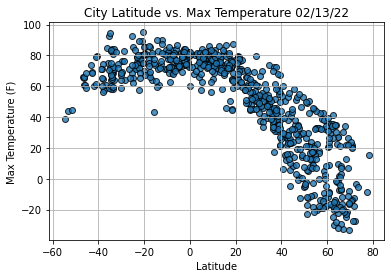

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

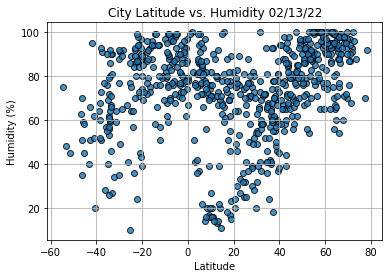

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

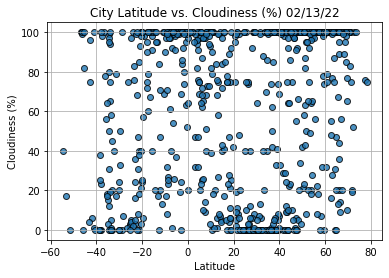

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

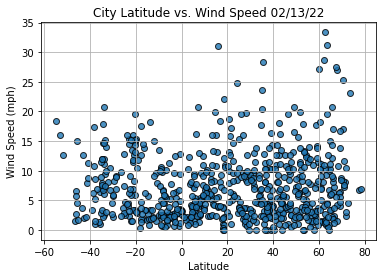

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
|